In [102]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [103]:
import tarfile
import os
import numpy as np
import pickle
from google.colab.patches import cv2_imshow
import cv2 as cv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import gzip
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import pandas as pd
import math

#Question1

#Visualisation

In [104]:
# open file
file = tarfile.open('/content/drive/MyDrive/SML/cifar-10-python.tar.gz')
# extract files
file.extractall('Files')
# close file
file.close()

In [105]:
def unpickle(file, typ):
  with open(file, 'rb') as fo:
    dict = pickle.load(fo, encoding=typ)
    return dict

In [106]:
def displayImage(image):
  image = image.reshape(3,32,32)
  image = image.transpose(1,2,0)
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  cv2_imshow(image)

In [107]:
def visualise(num):
  path = '/content/Files/cifar-10-batches-py/data_batch_'
  path += str(num)
  print('data_batch_'+str(num))
  data = unpickle(path,'latin1')
  for i in range(10):
    print('Class: '+str(i))
    count = 0
    for j in range(len(data['labels'])):
      if data['labels'][j]==i:
        count += 1
        displayImage(data['data'][j])
        if count==5:
          break

data_batch_1
Class: 0


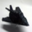

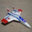

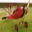

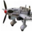

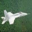

Class: 1


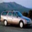

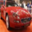

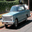

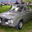

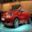

Class: 2


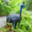

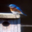

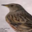

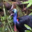

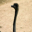

Class: 3


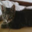

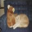

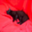

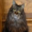

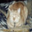

Class: 4


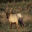

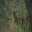

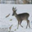

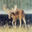

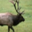

Class: 5


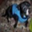

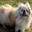

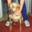

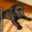

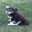

Class: 6


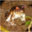

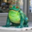

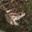

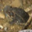

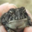

Class: 7


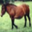

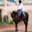

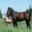

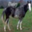

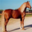

Class: 8


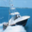

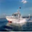

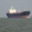

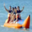

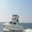

Class: 9


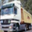

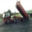

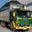

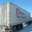

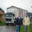

data_batch_2
Class: 0


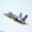

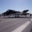

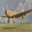

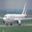

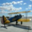

Class: 1


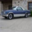

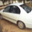

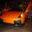

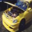

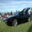

Class: 2


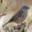

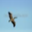

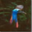

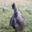

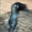

Class: 3


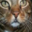

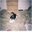

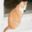

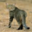

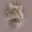

Class: 4


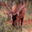

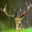

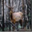

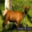

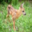

Class: 5


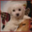

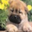

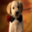

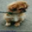

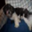

Class: 6


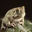

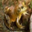

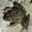

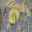

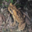

Class: 7


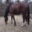

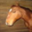

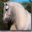

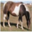

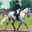

Class: 8


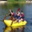

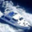

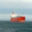

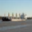

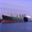

Class: 9


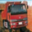

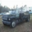

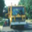

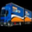

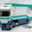

data_batch_3
Class: 0


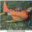

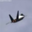

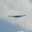

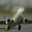

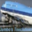

Class: 1


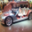

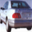

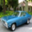

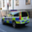

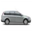

Class: 2


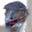

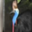

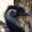

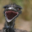

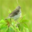

Class: 3


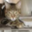

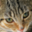

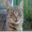

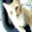

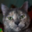

Class: 4


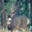

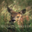

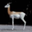

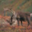

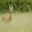

Class: 5


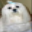

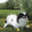

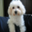

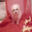

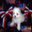

Class: 6


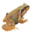

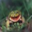

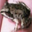

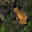

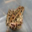

Class: 7


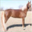

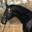

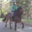

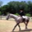

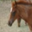

Class: 8


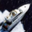

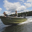

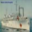

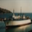

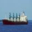

Class: 9


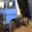

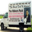

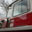

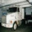

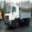

data_batch_4
Class: 0


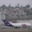

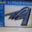

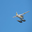

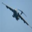

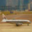

Class: 1


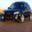

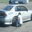

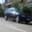

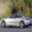

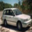

Class: 2


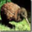

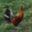

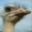

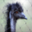

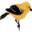

Class: 3


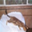

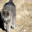

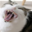

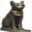

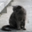

Class: 4


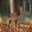

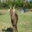

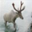

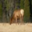

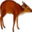

Class: 5


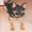

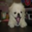

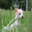

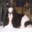

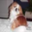

Class: 6


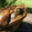

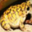

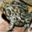

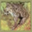

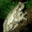

Class: 7


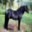

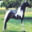

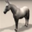

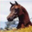

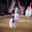

Class: 8


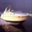

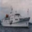

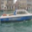

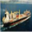

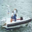

Class: 9


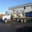

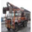

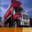

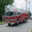

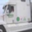

data_batch_5
Class: 0


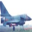

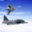

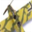

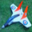

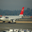

Class: 1


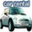

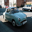

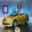

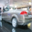

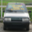

Class: 2


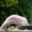

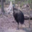

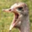

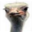

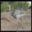

Class: 3


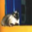

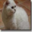

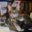

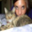

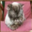

Class: 4


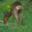

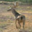

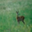

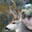

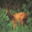

Class: 5


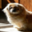

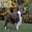

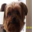

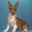

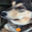

Class: 6


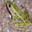

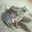

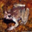

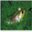

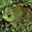

Class: 7


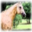

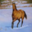

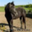

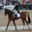

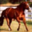

Class: 8


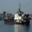

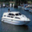

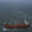

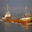

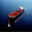

Class: 9


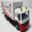

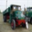

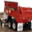

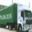

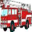

In [108]:
for i in range(5):
  visualise(i+1)

Creating dataset

In [109]:
batch_1 = unpickle('/content/Files/cifar-10-batches-py/data_batch_1', 'bytes')
batch_2 = unpickle('/content/Files/cifar-10-batches-py/data_batch_2', 'bytes')
batch_3 = unpickle('/content/Files/cifar-10-batches-py/data_batch_3', 'bytes')
batch_4 = unpickle('/content/Files/cifar-10-batches-py/data_batch_4', 'bytes')
batch_5 = unpickle('/content/Files/cifar-10-batches-py/data_batch_5', 'bytes')

test_data = unpickle('/content/Files/cifar-10-batches-py/test_batch', 'bytes')

X_train = []
X_train.extend(batch_1[b'data'])
X_train.extend(batch_2[b'data'])
X_train.extend(batch_3[b'data'])
X_train.extend(batch_4[b'data'])
X_train.extend(batch_5[b'data'])
X_train = np.array(X_train)
# X_train = X_train.reshape(X_train.shape[0],3,32,32)
y_train = []
y_train.extend(batch_1[b'labels'])
y_train.extend(batch_2[b'labels'])
y_train.extend(batch_3[b'labels'])
y_train.extend(batch_4[b'labels'])
y_train.extend(batch_5[b'labels'])
y_train = np.array(y_train)
print(X_train.shape,y_train.shape)
X_test = test_data[b'data']
y_test = test_data[b"labels"]
# X_test = X_test.reshape(X_test.shape[0],3,32,32)
y_test = np.array(y_test)
print(X_test.shape,y_test.shape)

(50000, 3072) (50000,)
(10000, 3072) (10000,)


#LDA

In [110]:
def lda(xtrain, ytrain, xtest):
  clf = LinearDiscriminantAnalysis()
  clf.fit(xtrain, ytrain)
  return clf.predict(xtest)

In [111]:
y_pred = lda(X_train, y_train, X_test)

#Accuracy

In [112]:
accuracy_score(y_test, y_pred)

0.3713

Class-wise accuracy

In [113]:
pred = []
test = []
for i in range(10):
  pred.append([])
  test.append([])

for i in range(len(y_pred)):
  cls = y_test[i]
  pred[cls].append(y_test[i])
  test[cls].append(y_pred[i])

for i in range(10):
  print('Class'+str(i), end = ' ')
  print(accuracy_score(test[i],pred[i]))

Class0 0.463
Class1 0.415
Class2 0.255
Class3 0.245
Class4 0.271
Class5 0.329
Class6 0.413
Class7 0.404
Class8 0.494
Class9 0.424


#Question2

In [114]:
def images_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images
def labels_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

In [115]:
X_train = images_file_read("/content/drive/MyDrive/SML/mnist/train-images-idx3-ubyte.gz")
print(X_train.shape)
y_train = labels_file_read("/content/drive/MyDrive/SML/mnist/train-labels-idx1-ubyte.gz")
X_test = images_file_read("/content/drive/MyDrive/SML/mnist/t10k-images-idx3-ubyte.gz")
print(X_test.shape)
y_test = labels_file_read("/content/drive/MyDrive/SML/mnist/t10k-labels-idx1-ubyte.gz")

(60000, 28, 28)
(10000, 28, 28)


In [116]:
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)

#PCA

In [117]:
def pca(num, xtrain, xtest):
  pca = PCA(n_components = num)
  pca.fit(xtrain)
  return pca.transform(xtrain), pca.transform(xtest)

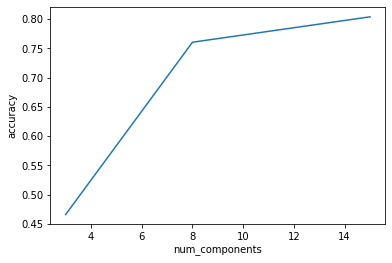

In [118]:
x_list = [15,8,3]
y_list = []

for n in x_list:
  train, test = pca(n,X_train,X_test)
  pred = lda(train, y_train, test)
  y_list.append(accuracy_score(y_test, pred))

plt.plot(x_list, y_list)
plt.xlabel('num_components')
plt.ylabel('accuracy')
plt.show()

#Question3

In [119]:
df_train = pd.read_csv("/content/drive/MyDrive/SML/fminst/fashion-mnist_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/SML/fminst/fashion-mnist_test.csv")

In [120]:
data = []
counter = []
for i in range(10):
  data.append(np.zeros((6000,784)))
  counter.append(0)

In [121]:
for index,row in df_train.iterrows():
  label = row['label']
  data[label][counter[label]] = np.array(row['pixel1':]).reshape(1,784)
  counter[label] += 1

for i in range(len(data)):
  data[i] = np.transpose(data[i])

In [122]:
X_data = data[0]
for i in range(1, len(data)):
  X_data = np.append(X_data,data[i],axis = 1)

In [123]:
X_data.shape

(784, 60000)

In [124]:
def scatter(X):
  mu = np.mean(X, axis = 1)
  Xc = np.empty((len(X),len(X[0])))
  for i in range(len(X)):
    for j in range(len(X[0])):
      Xc[i][j] = X[i][j]-mu[i]
  return np.dot(Xc,Xc.T)

In [125]:
def FDA(X_data,data):
  S_w = 0
  for i in range(len(data)):
    S_w += scatter(data[i])
  S_b = scatter(X_data)-S_w
  mat = np.dot(np.linalg.pinv(S_w),S_b)
  eigenvalues, eigenvectors = np.linalg.eig(mat)
  eiglist = [(eigenvalues[i],eigenvectors[:,i]) for i in range(len(eigenvalues))]
  eiglist = sorted(eiglist, key = lambda x: x[0], reverse = True)
  w = np.array([eiglist[i][1] for i in range(9)])
  return w

In [126]:
w = FDA(X_data,data)

In [127]:
w.shape

(9, 784)

In [128]:
X_data = X_data.T
Y = np.zeros((60000,9))
for i in range(60000):
  data_point = X_data[i]
  y = np.dot(w,data_point)
  Y[i] = y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [129]:
Y.shape

(60000, 9)

In [130]:
y_train = []
for i in range(60000):
  y_train.append(math.floor(i/6000))

In [131]:
X_test = np.array(df_test.loc[ : , df_test.columns != 'label'])
y_test = pd.DataFrame(df_test['label'])

In [132]:
Y_test = np.zeros((10000,9))
for i in range(10000):
  data_point = X_test[i]
  y = np.dot(w,data_point)
  Y_test[i] = y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


In [133]:
y_pred = lda(Y,y_train,Y_test)
accuracy_score(y_pred,y_test['label'].tolist())

0.8256

#Question4

In [134]:
X_train = images_file_read("/content/drive/MyDrive/SML/mnist/train-images-idx3-ubyte.gz")
print(X_train.shape)
y_train = labels_file_read("/content/drive/MyDrive/SML/mnist/train-labels-idx1-ubyte.gz")
X_test = images_file_read("/content/drive/MyDrive/SML/mnist/t10k-images-idx3-ubyte.gz")
print(X_test.shape)
y_test = labels_file_read("/content/drive/MyDrive/SML/mnist/t10k-labels-idx1-ubyte.gz")

X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)

X_train, X_test = pca(15, X_train, X_test)

(60000, 28, 28)
(10000, 28, 28)


In [135]:
print(X_train.shape)
print(X_test.shape)

(60000, 15)
(10000, 15)


In [136]:
X_train = pd.DataFrame(X_train)
X_train[15] = list(y_train)

In [137]:
data = []
for i in range(10):
  data.append([])

for index,row in X_train.iterrows():
  label = row[15]
  data[int(label)].append(row[0:15])

for i in range(len(data)):
  data[i] = np.transpose(np.array(data[i]))

In [138]:
X_data = data[0]
for i in range(1, len(data)):
  X_data = np.append(X_data,data[i],axis = 1)

In [139]:
X_data.shape

(15, 60000)

In [140]:
w = FDA(X_data,data)

In [141]:
w.shape

(9, 15)

In [142]:
X_data = X_data.T
Y = np.zeros((60000,9))
for i in range(60000):
  data_point = X_data[i]
  y = np.dot(w,data_point)
  Y[i] = y

In [143]:
Y.shape

(60000, 9)

In [144]:
length = []
for d in data:
  ro,col = d.shape
  length.append(col)

y_train = []
for i in range(length[0]):
  y_train.append(0)

for i in range(1,len(length)):
  for j in range(length[i]):
    y_train.append(i)

In [145]:
Y_test = np.zeros((10000,9))
for i in range(10000):
  data_point = X_test[i]
  y = np.dot(w,data_point)
  Y_test[i] = y

In [146]:
y_pred = lda(Y,y_train,Y_test)
accuracy_score(y_pred,y_test)

0.8039